In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
from htrc_features import FeatureReader
from htrc_features.feature_reader import group_tokenlist
from htrc_features.utils import id_to_rsync
from compare_tools.comparison import EFComparison, Comparison
from compare_tools.utils import HTID
import pandas as pd
from compare_tools.configuration import config

This notebooks demonstrates page-level Jaccard similarity. This an expensive procedure, but useful as a ground truth.

The algorithms for extracting runs operate on the Jaccard similarity matrix for pages the same way they do on GloVe or SRP
matrices for chunked books.

In [7]:
filenames = pd.read_csv(config['meta_path'], low_memory = False)

Some test code to explore vol and page methods. Can be cut.

In [8]:
ids = ["mdp.49015002670504", "inu.30000042783195"]

In [9]:
left, right = [HTID(id, parquet_root=config['parquet_root']) for id in ids]
left

In [10]:
right

In [11]:
comp = EFComparison(left, right)

Using HTID class


In [17]:
comp.jaccard_matrix
comp.similarity_matrix

array([[0.0625    , 0.05128205, 0.        , ..., 0.02717391, 0.01746725,
        0.        ],
       [0.        , 0.02702703, 0.04166667, ..., 0.01639344, 0.00877193,
        0.        ],
       [0.        , 0.07792208, 0.02941176, ..., 0.08450704, 0.06177606,
        0.        ],
       ...,
       [0.        , 0.05909091, 0.        , ..., 0.15454545, 0.16120219,
        0.        ],
       [0.        , 0.03111111, 0.        , ..., 0.05263158, 0.04950495,
        0.00473934],
       [0.00641026, 0.04624277, 0.01204819, ..., 0.08223684, 0.09384164,
        0.        ]])

I find 0.2 to be a reasonable threshold for Jaccard similarity. As you see here, there are many page-comparison pairs that reach 0.2 similarity (maybe largely short pages?) but the main run of similarity is successfully extracted.

In [19]:
comp.assemble_sw_runs(threshold=.2)

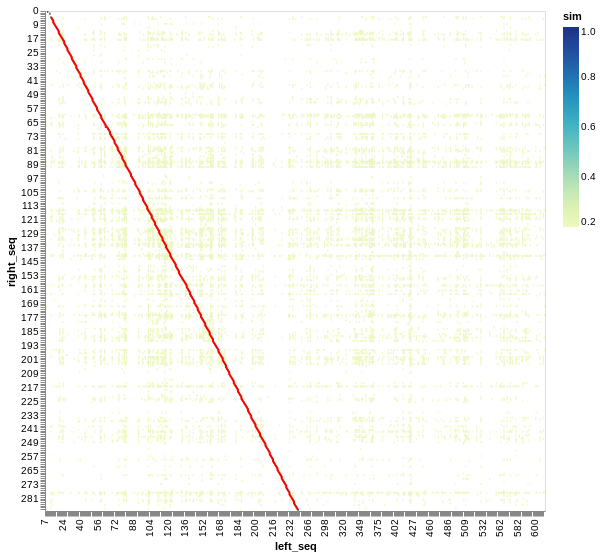

In [21]:
comp.plot("jaccard_matrix", filter = lambda x: x >= .2, runs = True).properties(width=500, height=500)